In [1]:
import numpy as np
import time

In [2]:
#Setup an input matrix
n = 10
A = np.random.randint(0,100,(n,n))

In [3]:
A

array([[16, 99, 28,  4, 16, 49, 86, 12, 65, 21],
       [57, 55, 90,  1, 22, 34, 91, 75, 24, 37],
       [56, 19, 69, 18, 54,  3, 37, 22, 15, 91],
       [40, 31, 46,  5, 82, 53, 48, 21,  4, 56],
       [44, 76, 90, 53, 35, 81, 93, 17, 21, 33],
       [81, 35, 34, 40, 53, 85, 81, 91, 49, 79],
       [36, 67, 64,  9, 47, 69, 96, 79, 25, 31],
       [57, 34, 18, 81, 71, 10, 49, 27, 63,  7],
       [42, 81, 93, 78, 77, 88, 56, 16,  8, 74],
       [10, 31, 33, 24, 48, 55, 89, 57, 78,  5]])

In [4]:
def binarypeak(a,n):
  if n == 1:
    return a[0]
  
  if n % 2 == 0:
    mid = int(n/2)
  else:
    mid = int((n+1)/2)
  
  #print('Arguments',mid,a[mid-2],a[mid-1],a[mid])
  if a[mid-1] < a[mid - 2]:
    #print('Passing to next level',a[:mid])
    return binarypeak(a[:mid],len(a[:mid]))
  elif a[mid-1] < a[mid]:
    #print('Passing to next level',a[mid:])
    return binarypeak(a[mid:],len(a[mid:]))
  else:
    return a[mid-1]

In [5]:
#Verify Function to use binary partions and find a peak
binarypeak(A[5,:],10)

91

In [6]:
size=1000
B = np.zeros((200,size))
#Plot performance of binary search
for i in range(size-1):
  count = 0
  for n in range(10,10000,50):
    A = np.random.randint(0,100,n)
    start = time.time()
    #print(A,n)
    binarypeak(A,n)
    end = time.time()
    B[count,0] = n
    B[count,i+1] = end-start
    count = count+1

In [7]:
B.shape

(200, 1000)

In [8]:
C = np.zeros((200,2))
C[:,0] = B[:,0]
C[:,1] = np.mean(B[:,1:size-1],axis=1)*1000

Text(0, 0.5, 'Running time')

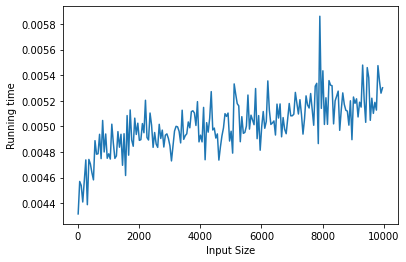

In [9]:
#Plot Performance vs Input Size
import matplotlib.pyplot as plt
plt.plot(C[:,0],C[:,1])
plt.xlabel('Input Size')
plt.ylabel('Running time')